In this tutorial we will use the basic functionallity of EMCEE (the MCMC software) to fit a quadratic function with some noise.

In [1]:
%matplotlib inline 
import numpy as np
import emcee
import matplotlib.pyplot as pl
from matplotlib.pyplot import cm 
from scipy.stats import norm

First we make our synthetic data:

In [2]:
def q(a,b,c,x):
    quad = a*x**2. + b*x + c
    return quad

In [3]:
x = np.linspace(-1,1,101)

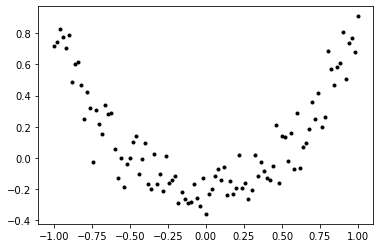

In [4]:
quad = q(1.,0.,-0.2,x)
noise = np.random.normal(0.0, 0.1, quad.shape)
noisy = quad + noise
pl.plot (x,noisy,"k.")
pl.show()

Now we set the hyperparamters required to run emcee:

In [5]:
nwalkers = 20
niter = 10
init_dist = [(-2.,0.),(-0.5,0.5),(-0.5,0.)]
ndim = len(init_dist)
sigma = 0.1

Now we will set up some prior information. If we know something about our system, say from spectra, we can inform our model by setting priors. Here we will set uninformed priors, but you can have informed priors such as gaussian priors:

In [6]:
priors = [(-4.,4.),(-1.,1.),(-1.,1.)]

Generate an initial guess for all the parameters:

In [7]:
def rpars(init_dist):
    return [np.random.rand() * (i[1]-i[0]) + i[0] for i in init_dist]

Instate the priors such that if a parameter falls outside the prior range, the value will be set to negative infinity and the model will not be accepted:

In [8]:
def lnprior(priors, values):
    
    lp = 0.
    for value, prior in zip(values, priors):
        if value >= prior[0] and value <= prior[1]:
            lp+=0
        else:
            lp+=-np.inf 
    return lp

Now we will specify our log probability function, which will include our figure of merit computation. Here, z will be the array of values returned by the mcmc algorithm. The value this function returns is the log probability value:

In [9]:
def lnprob(z):
    
    lnp = lnprior(priors,z)
    if not np.isfinite(lnp):
            return -np.inf

    # make a model using the values the sampler generated
    model = q(z[0],z[1],z[2],x)

    # use chi^2 to compare the model to the data:
    chi2 = 0.
    for i in range (len(x)):
            chi2+=((noisy[i]-model[i])**2)/(sigma**2)

    # calculate lnp
    lnprob = -0.5*chi2 + lnp

    return lnprob

Now we will set the run function which will combine all our computations and plot histograms of the results:

In [10]:
def run(init_dist, nwalkers, niter, ndim):

    # Generate initial guesses for all parameters for all chains
    p0 = np.array([rpars(init_dist) for i in range(nwalkers)])

    # Generate the emcee sampler. Here the inputs provided include the 
    # lnprob function. With this setup, the first parameter
    # in the lnprob function is the output from the sampler (the paramter 
    # positions).
    sampler = emcee.EnsembleSampler(nwalkers,ndim,lnprob)

    pos, prob, state = sampler.run_mcmc(p0, niter)

    for i in range(ndim):
        pl.figure()
        y = sampler.flatchain[:,i]
        n, bins, patches = pl.hist(y, 200, density=1, color="b", alpha=0.45)
        pl.title("Dimension {0:d}".format(i))
        
        mu = np.average(y)
        sigma = np.std(y)       
        print("mu,", "sigma = ", mu, sigma)

        bf = norm.pdf(bins, mu, sigma)
        l = pl.plot(bins, bf, 'k--', linewidth=2.0)

    pl.show()
    return pos

mu, sigma =  -0.6310071530941613 0.6848544790979932
mu, sigma =  0.047767811300546095 0.33032765568641387
mu, sigma =  -0.13251593053115737 0.13893429878557373


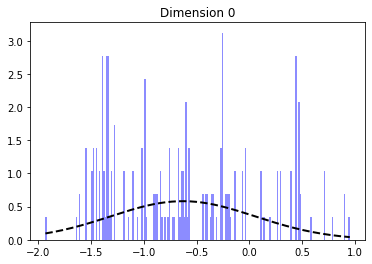

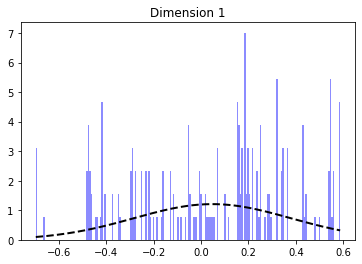

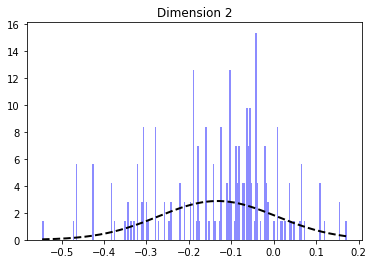

In [11]:
niter=10
pos = run(init_dist, nwalkers, niter, ndim)

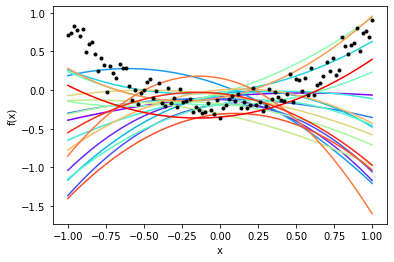

In [12]:
color=cm.rainbow(np.linspace(0,1,nwalkers))
for i,c in zip(range(nwalkers),color):
    
    model = pos[-1-i,0]*x**2 + pos[-1-i,1]*x + pos[-1-i,2]
    
    pl.plot(x,model,c=c)
    
pl.plot(x,noisy,"k.")
pl.xlabel("x")
pl.ylabel("f(x)")
pl.show()

Now lets update the number of iterations to see how this affects our parameter values (this may take a while to run):

mu, sigma =  1.0037387138533749 0.22077763201707123
mu, sigma =  0.008688459738160684 0.0540823670929102
mu, sigma =  -0.2364705772604996 0.04145150202523718


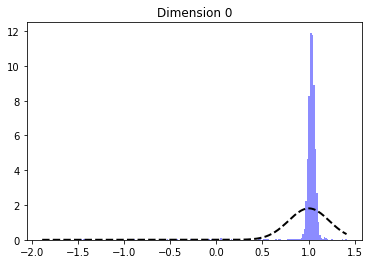

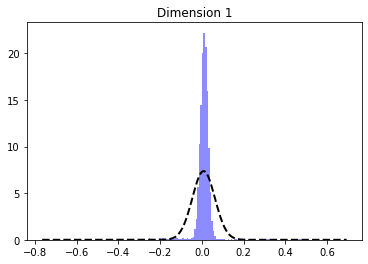

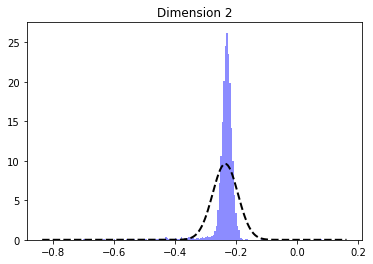

In [13]:
niter = 1000

pos = run(init_dist, nwalkers, niter, ndim)

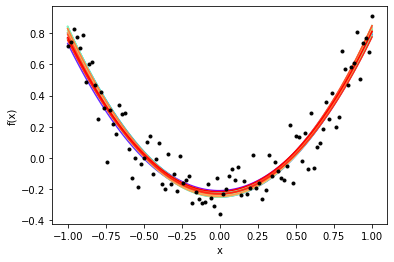

In [14]:
color=cm.rainbow(np.linspace(0,1,nwalkers))
for i,c in zip(range(nwalkers),color):
    
    model = pos[-1-i,0]*x**2 + pos[-1-i,1]*x + pos[-1-i,2]
    
    pl.plot(x,model,c=c)
    
pl.plot(x,noisy,"k.")
pl.xlabel("x")
pl.ylabel("f(x)")
pl.show()